In [282]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [283]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv("iris.data",header=None, names=columns)

X = df.drop('class', axis=1).values
y = df['class'].values
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2

y = y.astype(int)
num_classes = len(np.unique(y))
y_one_hot = np.eye(num_classes)[y]
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.7, random_state=42)

In [284]:
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim) / np.sqrt(self.input_dim)
        self.b1 = np.zeros((1, self.hidden_dim))
        self.W2 = np.random.randn(self.hidden_dim, self.output_dim) / np.sqrt(self.hidden_dim)
        self.b2 = np.zeros((1, self.output_dim))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        exp_scores = np.exp(self.z2)
        self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def backward(self, X, y, learning_rate):
        delta3 = self.probs - y
        dW2 = np.dot(self.a1.T, delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = np.dot(delta3, self.W2.T) * (1 - np.power(self.a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def predict(self, X):
        self.forward(X)
        return np.argmax(self.probs, axis=1)

    def evaluate(self, X, y):
        preds = self.predict(X)
        accuracy = np.mean(preds == np.argmax(y, axis=1))
        return accuracy

In [285]:
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = y_train.shape[1]

nn = NeuralNetwork(input_dim, hidden_dim, output_dim)

learning_rate = 0.001
num_epochs = 150

train_loss = []
train_acc = []
test_loss = []
test_acc = []
for epoch in range(num_epochs):
    nn.forward(X_train)
    nn.backward(X_train, y_train, learning_rate)
    train_loss.append(-np.mean(np.sum(y_train * np.log(nn.probs), axis=1)))
    train_acc.append(nn.evaluate(X_train, y_train))
    nn.forward(X_test)
    test_loss.append(-np.mean(np.sum(y_test * np.log(nn.probs), axis=1)))
    test_acc.append(nn.evaluate(X_test, y_test))

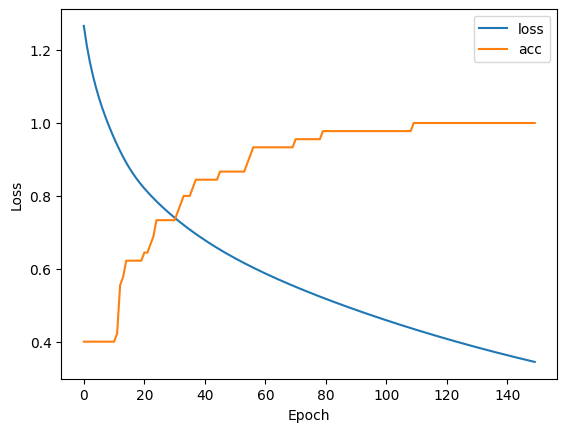

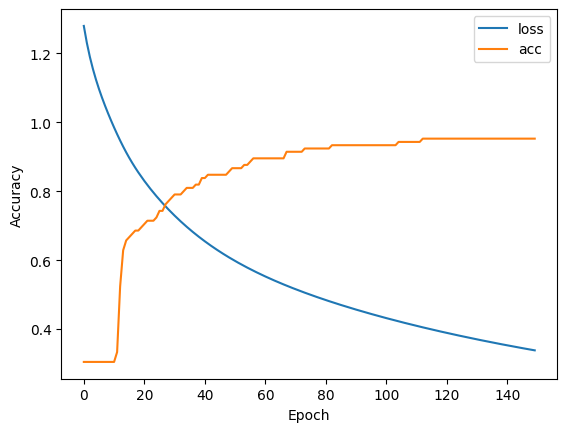

In [286]:
plt.plot(train_loss, label='loss')
plt.plot(train_acc, label='acc')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(test_loss, label='loss')
plt.plot(test_acc, label='acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()